### 회귀
독립변수 x -> 연속형 종속변수 y 예측
1. **선형회귀** ( 단순, 다중 )
2. **다항회귀** -> 고차원
3. **규제가 있는 회귀** ( 라쏘, 릿지, 엘라스틱넷 ) -> 비용 함수
4. **로지스틱 회귀** ( 분류와 비슷 )

In [50]:
import numpy as np

### 회귀 계수 구하기 : 최소 제곱법

In [51]:
# 독립 변수, 종속 변수 입력
X = np.array([153.3, 164.9, 168.1, 151.5, 157.8, 156.7, 161.1])
y = np.array([45.5, 56.0, 55.0, 52.8, 55.6, 50.8, 56.4])

# 공식에 필요한 값 입력
xy = X*y # dot이 아닌 *는 각각의 index에서 계산하게 됨
x_square = X*X
x_mean = np.mean(X)
y_mean = np.mean(y)

print(xy)
print(x_square)
print(x_mean, y_mean)

[6975.15 9234.4  9245.5  7999.2  8773.68 7960.36 9086.04]
[23500.89 27192.01 28257.61 22952.25 24900.84 24554.89 25953.21]
159.05714285714288 53.15714285714286


In [52]:
# 회귀 계수 구하기
n = len(X)

theta_1 = (np.sum(xy) - n*x_mean*y_mean) / (np.sum(x_square) - n*x_mean*x_mean)
theta_0 = y_mean - theta_1*x_mean

print(theta_0, theta_1)

-12.057393223598368 0.41000696296496186


### 회귀 계수 구하기 : 정규 방정식

In [53]:
# x값 바꿔주기
one = np.ones([7, 1]) # 7*1 shape의 1로 찬 배열 생성
X_b = np.c_[one, X] # 7*2 shape으로 1, xi 배열 생성

# 정규 방정식으로 회귀 계수 계산
# A*B*C = A.dot(B).dot(C)
# A-1 = np.linalg.inv(A)
# AT = A.T
theta_NE = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_NE)

[-12.05739322   0.41000696]


### 회귀 계수 구하기 : sklearn - LinearRegression

In [54]:
X = X.reshape((7, 1)) # X.shape = (7, )이므로 계산 가능하게 변경
y = y.reshape((7, 1))

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 계수 확인
print(lin_reg.intercept_, lin_reg.coef_)

[-12.05739322] [[0.41000696]]


## 경사 하강법

### 1. 배치 경사 하강법
경사 하강법의 매 스텝에서 전체 훈련 세트 X에 대해 계산하는 알고리즘

In [55]:
# 임의로 Data 생성
X = 2 * np.random.rand(100, 1) # 0~2 사이의 균등한 난수 100개
y = 4 + 3*X + np.random.randn(100, 1) # y = 4+3x + 가우시안블러(표준정규분포로 뽑은 난수 100개)

# x값 바꿔주기
one = np.ones([100, 1]) # 7*1 shape의 1로 찬 배열 생성
X_b = np.c_[one, X] # 7*2 shape으로 1, xi 배열 생성

In [56]:
learning_rate = 0.01
n_epoch = 3000
n = len(X)

theta_GD = np.random.rand(2, 1) # 0~1의 값 2개
for epoch in range(n_epoch):
    gradients = (2/n) * X_b.T.dot( X_b.dot(theta_GD)-y )
    theta_GD = theta_GD - learning_rate * gradients
print(theta_GD.T)

[[3.71928792 3.13971001]]


### 2. 확률적 경사 하강법 
매 스텝에서 한 개의 샘플을 무작위 선택, 그 하나의 샘플에 대한 gradient 계산 → batch size = 1

In [57]:
n_epochs = 50
n = len(X) # 100
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(n):
        # 랜덤 샘플 지정
        random_index = np.random.randint(n)
        xi = X_b[random_index].reshape(2,1).T
        yi = y[random_index].reshape(1,1)
        gradients = 2 * xi.T.dot( xi.dot(theta)-yi )
        eta = 0.1 # 학습률
        theta = theta - eta * gradients
        
print(theta) # 값이 조금 다른 것을 확인할 수 있음 ( 실행마다 값도 다름 )

[[3.9815983 ]
 [2.85776523]]


(2, 1)


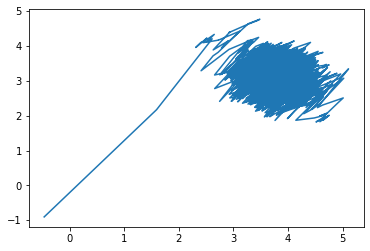

In [58]:
# 값이 튀는 것을 확인하기 위해 회귀계수 경로
theta_s = np.zeros((2,1))
n_epochs = 50
n = len(X)
theta = np.random.randn(2,1)
print(theta.shape)

for epoch in range(n_epochs) :
    for i in range(n) :
        random_index = np.random.randint(n)
        xi = X_b[random_index].reshape(1,2)
        yi = y[random_index].reshape(1,1)
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = 0.1
        theta_s = np.append(theta_s, theta, axis=1)
        theta = theta - eta * gradients
        
theta_s = np.delete(theta_s, 0, axis=1)

import matplotlib.pyplot as plt

plt.plot(theta_s[0], theta_s[1])
plt.show()
        

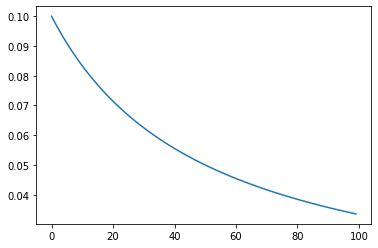

In [59]:
t0, t1 = 5, 50

def learning_schedule(t) :
    return t0 / ( t + t1 )

ls_s = []

for i in range(100):
    ls_s.append(learning_schedule(i))

plt.plot(ls_s) # t가 증가할수록 학습률이 감소

In [60]:
n_epochs = 50
n = len(X) # 100
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(n):
        # 랜덤 샘플 지정
        random_index = np.random.randint(n)
        xi = X_b[random_index].reshape(2,1).T
        yi = y[random_index].reshape(1,1)
        gradients = 2 * xi.T.dot( xi.dot(theta)-yi )
        eta = learning_schedule(epoch * n + i) # 학습이 진행될수록 학습률 감소
        theta = theta - eta * gradients
        
print(theta) # 값이 안정적으로 변경됨

[[3.7537519 ]
 [3.21843334]]


### 3. 미니 배치 경사 하강법
매 스텝에서 미니배치라고 불리는 하나의 샘플에 대한 gradient를 계산하는 방법

[[3.7537519 ]
 [3.21843334]]


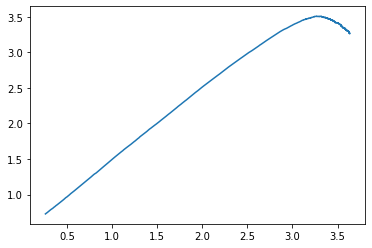

In [157]:
# 배치 사이즈=20 / epoch=50 / learning rate = 0.05
# 그래프 시각화까지 할 것 ! 
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# x값 바꿔주기
one = np.ones([100, 1]) # 7*1 shape의 1로 찬 배열 생성
X_b = np.c_[one, X] # 7*2 shape으로 1, xi 배열 생성

n_epochs = 500
n = len(X)
eta = 0.001
batch_size = 20
iter_n = int(n/batch_size)
idx = 0

# 그래프 출력을 위한 변수
theta_s = np.zeros((2,1))

theta_GD = np.random.rand(2, 1) # 0~1의 값 2개
for epoch in range(n_epochs) :
    for i in range(iter_n):
        # np.random.shuffle은 기존의 배열을 변경
        # np.random.permutation은 섞은 배열 새로 생성 
        idx = np.arange(X_b.shape[0])
        np.random.shuffle(idx)

        X_b_shuffled = X_b[idx][:batch_size]
        y_shuffled = y[idx][:batch_size]
        
        gradients = (2/batch_size) * X_b_shuffled.T.dot( X_b_shuffled.dot(theta_GD)-y_shuffled )
        theta_GD = theta_GD - eta * gradients
        theta_s = np.append(theta_s, theta_GD, axis=1)
        
print(theta)
theta_s = np.delete(theta_s, 0, axis=1) # 0인 값 제외 

# 그래프 그리기 
import matplotlib.pyplot as plt

plt.plot(theta_s[0], theta_s[1])
plt.show()